In [5]:
import sys
import os
sys.path.append('../../')

%load_ext autoreload
%autoreload 2
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from skimage.io import imread

from gen.load_data import load_data

In [7]:
from sklearn.utils import shuffle

train_df, valid_df, test_df = load_data('../../data')

train_df = shuffle(train_df)
valid_df = shuffle(valid_df)

print(train_df.head())


                                                  image                   id  \
2961  ../../data/Train/CameraRGB/episode_0000_000292...  episode_0000_000292   
78                   ../../data/Train/CameraRGB/585.png                  585   
1570  ../../data/Train/CameraRGB/episode_0012_000059...  episode_0012_000059   
1891  ../../data/Train/CameraRGB/episode_0002_000129...  episode_0002_000129   
2059  ../../data/Train/CameraRGB/episode_0012_000036...  episode_0012_000036   

                                                  label  
2961  ../../data/Train/CameraSeg/episode_0000_000292...  
78                   ../../data/Train/CameraSeg/585.png  
1570  ../../data/Train/CameraSeg/episode_0012_000059...  
1891  ../../data/Train/CameraSeg/episode_0002_000129...  
2059  ../../data/Train/CameraSeg/episode_0012_000036...  


In [9]:
from models.fcn8 import model_fcn8

model = model_fcn8(12, image_shape=(384, 384, 3), keep_prob=0.5)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 384, 384, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 384, 384, 64) 1792        input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 384, 384, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 192, 192, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

In [13]:
from gen.datagen import balanced_generator_from_df

BATCH_SIZE = 32

model_dir = '../../saved_models/fcn8/fcn8_v5/'

if not os.path.exists(model_dir):
    os.mkdir(model_dir)


train_gen = balanced_generator_from_df(train_df, BATCH_SIZE, (384, 384))
valid_gen = balanced_generator_from_df(valid_df, BATCH_SIZE, (384, 384))


In [17]:
from train import iou_loss
from keras.utils.training_utils import multi_gpu_model
from keras.optimizers import RMSprop

gpus = 2

# opt = RMSprop(lr=1e-04)
# model_gpu = multi_gpu_model(model, gpus)
model.compile(loss=iou_loss,
              optimizer='adam',
              metrics=['acc'])


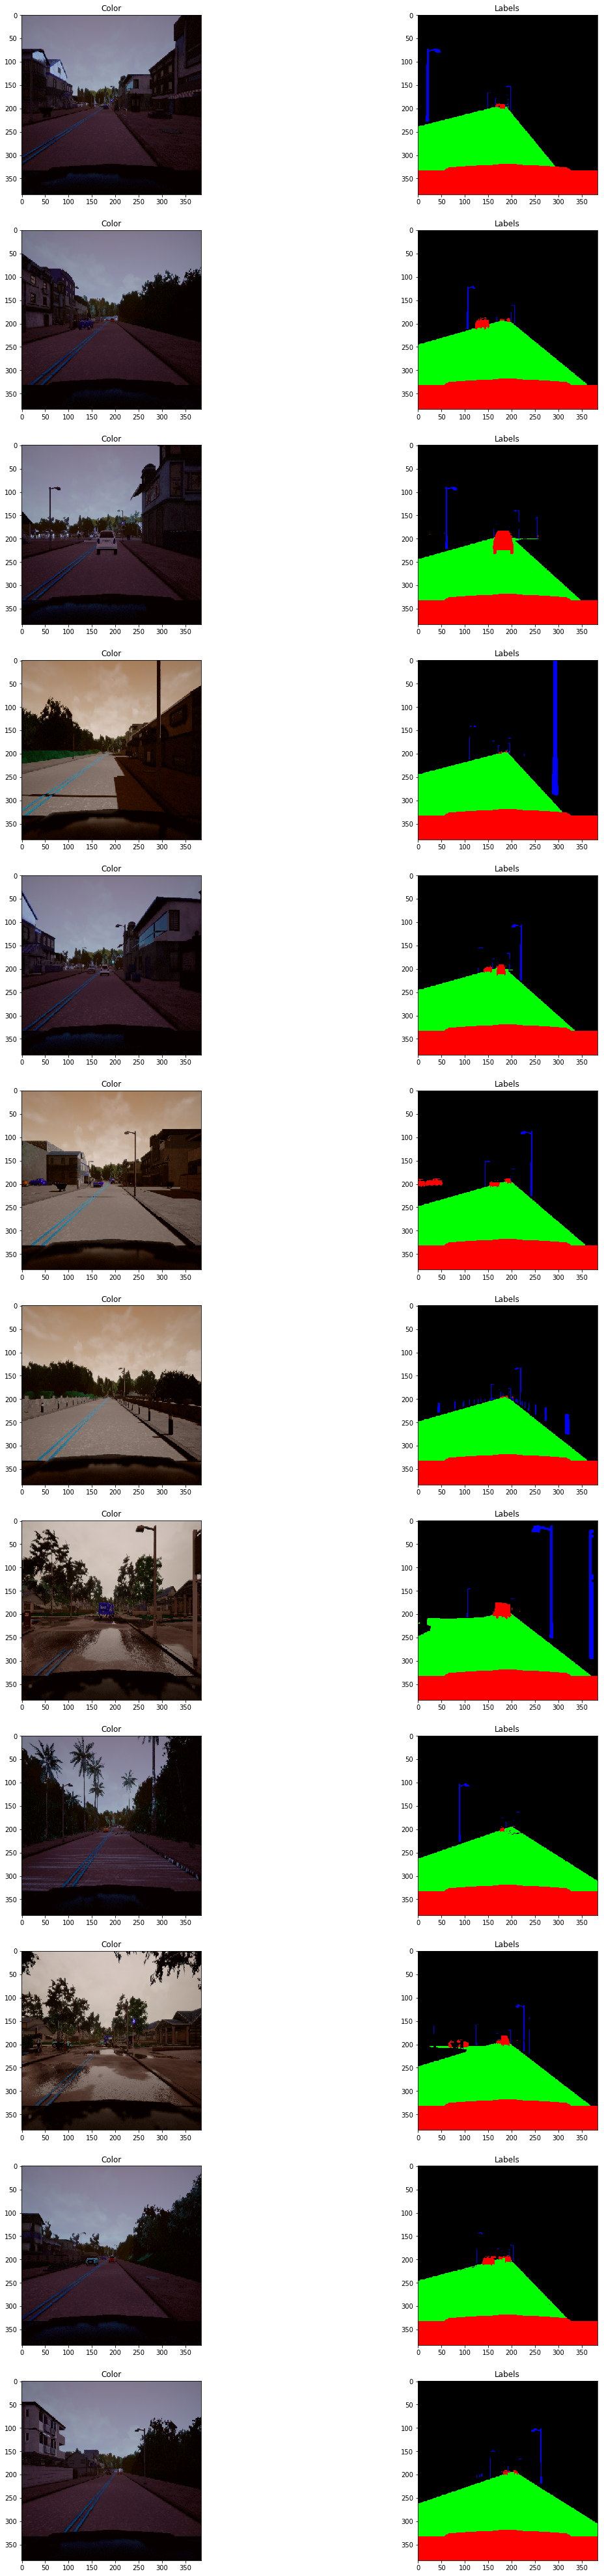

In [19]:
X, Y = next(train_gen)

sample_rows = 12
fig, m_axs = plt.subplots(sample_rows, 2, figsize = (20, 6*sample_rows))
# [c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2), rgb_img, lab_img in zip(m_axs, X, Y):
    # undoing the vgg correction is tedious
    r_rgb_img = np.clip(rgb_img+110, 0, 255).astype(np.uint8)
    lab_img = np.clip(lab_img*255, 0, 255).astype(np.uint8)
    ax1.imshow(r_rgb_img)
    ax1.set_title('Color')
    ax2.imshow(lab_img[:, :, 0:3])
    ax2.set_title('Labels')

In [20]:
history = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 5s 141ms/step - loss: 0.9185 - acc: 0.0837
Epoch 2/100
32/32 [==============================] - 1s 33ms/step - loss: 0.8908 - acc: 0.1121
Epoch 3/100
32/32 [==============================] - 1s 33ms/step - loss: 0.8575 - acc: 0.1458
Epoch 4/100
32/32 [==============================] - 1s 33ms/step - loss: 0.8243 - acc: 0.1791
Epoch 5/100
32/32 [==============================] - 1s 33ms/step - loss: 0.7944 - acc: 0.2090
Epoch 6/100
32/32 [==============================] - 1s 33ms/step - loss: 0.7686 - acc: 0.2346
Epoch 7/100
32/32 [==============================] - 1s 33ms/step - loss: 0.7465 - acc: 0.2566
Epoch 8/100
32/32 [==============================] - 1s 33ms/step - loss: 0.7266 - acc: 0.2765
Epoch 9/100
32/32 [==============================] - 1s 33ms/step - loss: 0.7077 - acc: 0.2953
Epoch 10/100
32/32 [==============================] - 1s 33ms/step - loss: 0.6891 - acc: 0.3137
Epoch 11/100
32/32 [============================

Epoch 87/100
32/32 [==============================] - 1s 34ms/step - loss: 0.0829 - acc: 0.9172
Epoch 88/100
32/32 [==============================] - 1s 34ms/step - loss: 0.0824 - acc: 0.9176
Epoch 89/100
32/32 [==============================] - 1s 34ms/step - loss: 0.0812 - acc: 0.9189
Epoch 90/100
32/32 [==============================] - 1s 34ms/step - loss: 0.0811 - acc: 0.9189
Epoch 91/100
32/32 [==============================] - 1s 34ms/step - loss: 0.0799 - acc: 0.9201
Epoch 92/100
32/32 [==============================] - 1s 34ms/step - loss: 0.0796 - acc: 0.9205
Epoch 93/100
32/32 [==============================] - 1s 34ms/step - loss: 0.0788 - acc: 0.9213
Epoch 94/100
32/32 [==============================] - 1s 34ms/step - loss: 0.0786 - acc: 0.9215
Epoch 95/100
32/32 [==============================] - 1s 34ms/step - loss: 0.0782 - acc: 0.9219
Epoch 96/100
32/32 [==============================] - 1s 34ms/step - loss: 0.0777 - acc: 0.9223
Epoch 97/100
32/32 [====================

KeyError: 'val_acc'

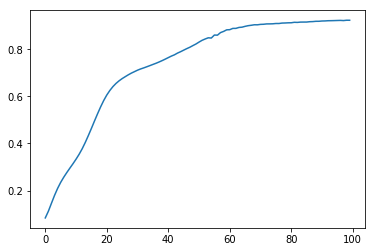

In [21]:
# # summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

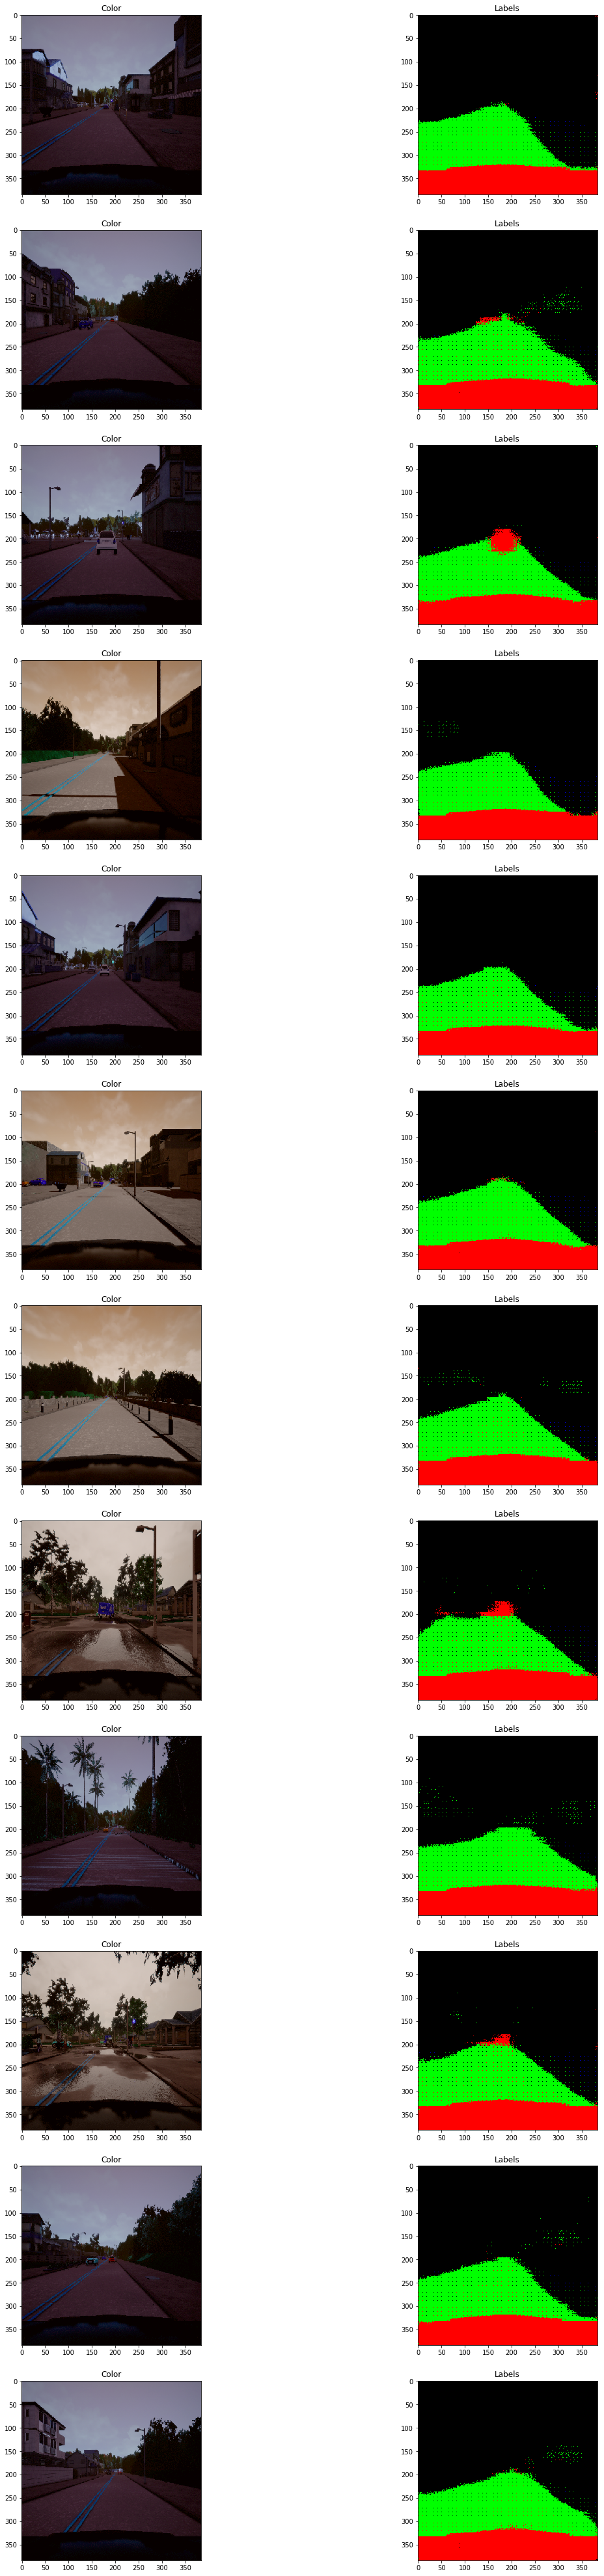

In [33]:
sample_rows = 12
fig, m_axs = plt.subplots(sample_rows, 2, figsize = (20, 6*sample_rows))
# [c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2), rgb_img, lab_img in zip(m_axs, X, Y):
    # undoing the vgg correction is tedious
    r_rgb_img = np.clip(rgb_img+110, 0, 255).astype(np.uint8)
#     lab_img = np.clip(lab_img*255, 0, 255).astype(np.uint8)
    lab_img = model.predict(np.expand_dims(r_rgb_img, axis=0))
    output = np.argmax(lab_img, axis=-1)
    
    new_lbl = np.zeros((r_rgb_img.shape[0], r_rgb_img.shape[1], 3))
    new_lbl[:, :, 0] = (output == 0).astype(np.uint8)
    new_lbl[:, :, 1] = (output == 1).astype(np.uint8)
    new_lbl[:, :, 2] = (output == 2).astype(np.uint8)
    ax1.imshow(r_rgb_img)
    ax1.set_title('Color')
    ax2.imshow(new_lbl)
    ax2.set_title('Labels')